# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [1]:
#Importo tutte le librerie necessarie

import numpy as np # Libreria per la manipolazione di array e calcoli matematici
import matplotlib.pyplot as plt  # Libreria per la creazione di grafici
import pandas as pd # Libreria per la manipolazione e l'analisi di dati

In [2]:
#Figure più leggibili

# Imposto le dimensioni del titolo dell'asse
plt.rcParams['axes.titlesize'] = 16

# Imposto le dimensioni delle etichette dell'asse
plt.rcParams['axes.labelsize'] = 14

# Imposto le dimensioni della legenda
plt.rcParams['legend.fontsize'] = 12

# Imposto le dimensioni dei tick sull'asse x
plt.rcParams['xtick.labelsize'] = 12

# Imposto le dimensioni dei tick sull'asse y
plt.rcParams['ytick.labelsize'] = 12

# Disabilito le linee del bordo destro degli assi
plt.rcParams['axes.spines.right'] = False

# Disabilito le linee del bordo superiore degli assi
plt.rcParams['axes.spines.top'] = False

# Imposto la griglia
plt.rcParams['axes.grid'] = True

In [9]:
# Carico i dati dal file 'unif.txt'
data_unif = pd.read_csv("unif.txt", index_col = False, header = 0, sep = "\s+", names = ["mu", "err"])

# Imposto i parametri
M = 10000 # Numero di estrazioni 
N = 100 # Numero di blocchi
L = int(M/N) # Numero di step per blocco
x = np.arange(N) # Genero gli indici dell'asse x

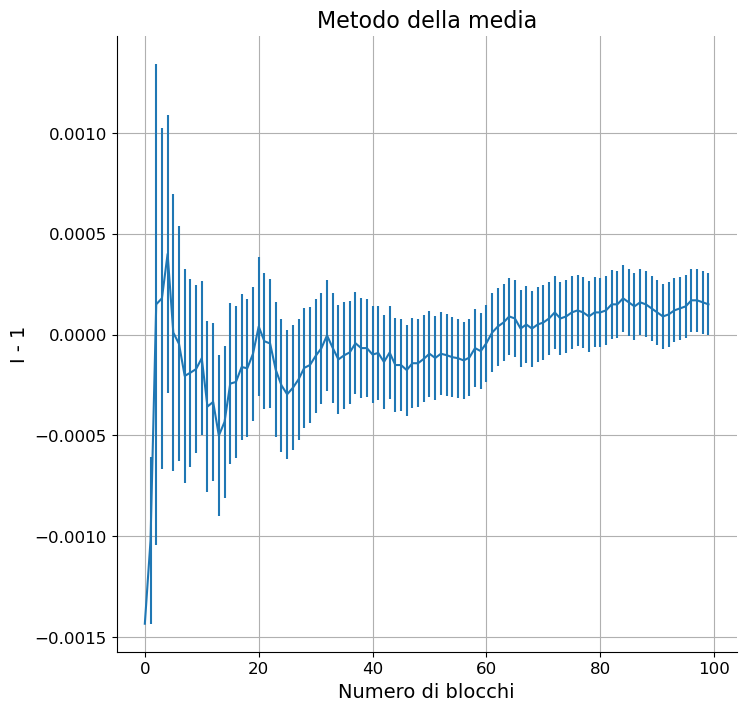

In [10]:
# Creo il grafico a barre con errori
fig = plt.figure(figsize = (8,8))
plt.errorbar(x, data_unif.mu - 1., yerr = data_unif.err)

# Etichette degli assi
plt.xlabel('Numero di blocchi')
plt.ylabel('I - 1')

# Titolo
plt.title("Metodo della media")

# Mostro il grafico
plt.show()

In [12]:
# Carico i dati dal file 'importance.txt'
data_imp = pd.read_csv("importance.txt", index_col = False, header = 0, sep = "\s+", names = ["mu", "err"])

# Imposto i parametri
M = 10000 # Numero di estrazioni 
N = 100 # Numero di blocchi
L = int(M/N) # Numero di step per blocco
x = np.arange(N) # Genero gli indici dell'asse x

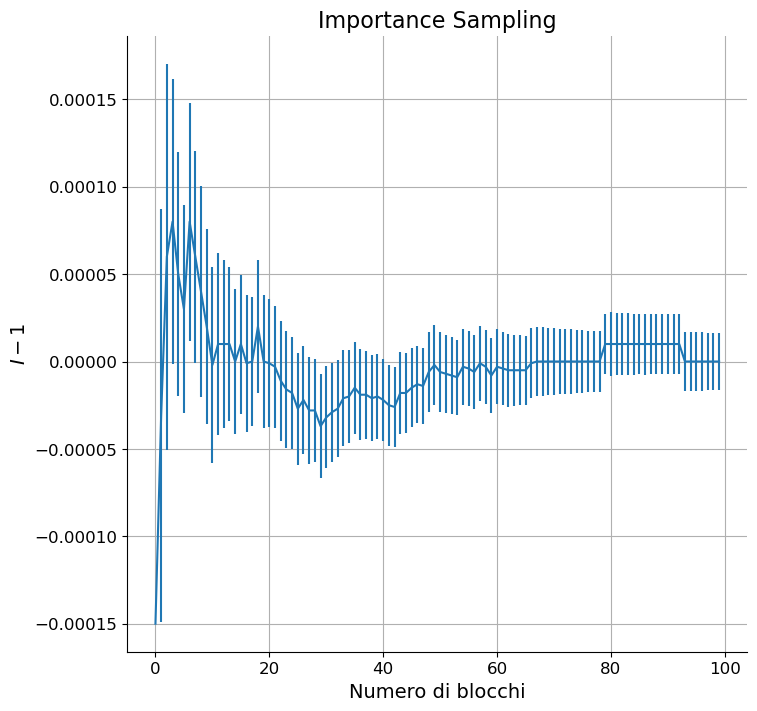

In [13]:
# Creo il grafico a barre con errori
fig = plt.figure(figsize = (8,8))
plt.errorbar(x, data_imp.mu - 1., yerr = data_imp.err)

# Etichette degli assi
plt.xlabel('Numero di blocchi')
plt.ylabel(r'$I - 1$')

# Titolo
plt.title("Importance Sampling")

# Mostro il grafico
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

In [15]:
# Carico i dati dal file 'rw_r.txt'
data_rwr = pd.read_csv("rw_ret.txt", index_col=False, header = 0, sep = "\s+", names = ["mu", "err"])

In [16]:
# Imposto i parametri
x = np.arange(N) # Genero gli indici dell'asse x
t = np.linspace(1,100,10000)
teo = np.sqrt(t) # Genero la distribuzione teorica

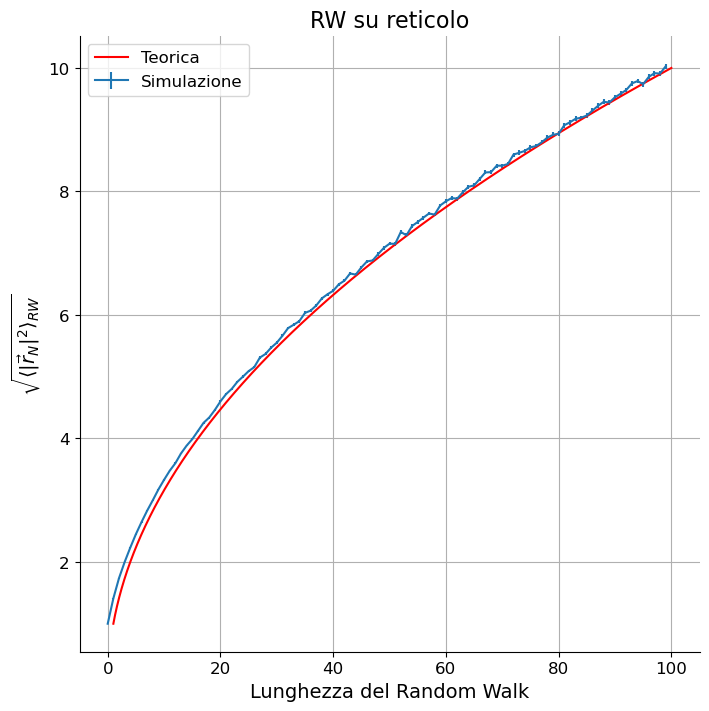

In [17]:
# Creo il grafico a barre con errori
fig = plt.figure(figsize = (8,8))
plt.errorbar(x, data_rwr.mu, yerr = data_rwr.err, label = "Simulazione") 

# Creo il grafico della distribuzione teorica
plt.plot(t, teo, color = "red", label = "Teorica")

# Etichette degli assi
plt.xlabel('Lunghezza del Random Walk')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')

# Titolo
plt.title("RW su reticolo")

# Legenda
plt.legend()

# Mostro il grafico
plt.show()

In [18]:
# Carico i dati dal file 'rw_r.txt' e li converto in un array NumPy
data_rwc = pd.read_csv("rw_cont.txt", index_col=False, header = 0, sep = "\s+", names = ["mu", "err"])

In [19]:
# Imposto i parametri
x = np.arange(N) # Genero gli indici dell'asse x
t = np.linspace(1,100,10000)
teo = np.sqrt(t) # Genero la distribuzione teorica

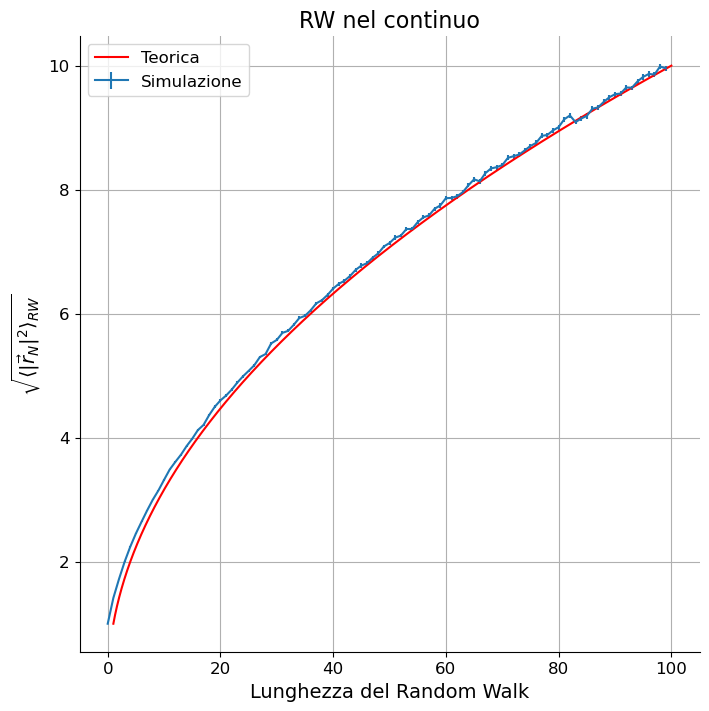

In [21]:
# Creo il grafico a barre con errori
fig = plt.figure(figsize = (8,8))
plt.errorbar(x, data_rwc.mu, yerr = data_rwc.err, label = "Simulazione") 

# Creo il grafico della distribuzione teorica
plt.plot(t, teo, color = "red", label = "Teorica")

# Etichette degli assi
plt.xlabel('Lunghezza del Random Walk')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')

# Titolo
plt.title("RW nel continuo")

# Legenda
plt.legend()

# Mostro il grafico
plt.show()

I risultati indicano un comportamento diffusivo, infatti una distribuzione di probabilità che soddisfa l'equazione di diffusione ha $\langle x(N) \rangle = 0$ e $\langle x^2 (N) \rangle \sim k \; N$, come abbiamo verificato con le simulazioni.